In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os

In [8]:
ds, ds_info = tfds.load('wider_face', with_info=True, shuffle_files=True)
ds_train = ds['train']
ds_test = ds['test']
ds_validation = ds['validation']
print(ds_train)

for example in ds_train.take(1):
  faces = example['faces']
  image = example['image']
  filename = example['image/filename']
  print('Shape: ', image.shape, '\nFile Name: ', filename, '\n')
  for key, value in faces.items():
    print(key,' ',value,'\n')

<_PrefetchDataset element_spec={'faces': {'bbox': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'blur': TensorSpec(shape=(None,), dtype=tf.uint8, name=None), 'expression': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'illumination': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'invalid': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'occlusion': TensorSpec(shape=(None,), dtype=tf.uint8, name=None), 'pose': TensorSpec(shape=(None,), dtype=tf.bool, name=None)}, 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None)}>
Shape:  (768, 1024, 3) 
File Name:  tf.Tensor(b'38--Tennis/38_Tennis_Tennis_38_759.jpg', shape=(), dtype=string) 

bbox   tf.Tensor([[0.10677084 0.375      0.44791666 0.57421875]], shape=(1, 4), dtype=float32) 

blur   tf.Tensor([0], shape=(1,), dtype=uint8) 

expression   tf.Tensor([False], shape=(1,), dtype=bool) 

illumination   tf.Tensor([False], shape=(1

In [7]:
ds_info.features

FeaturesDict({
    'faces': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=float32),
        'blur': uint8,
        'expression': bool,
        'illumination': bool,
        'invalid': bool,
        'occlusion': uint8,
        'pose': bool,
    }),
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
})

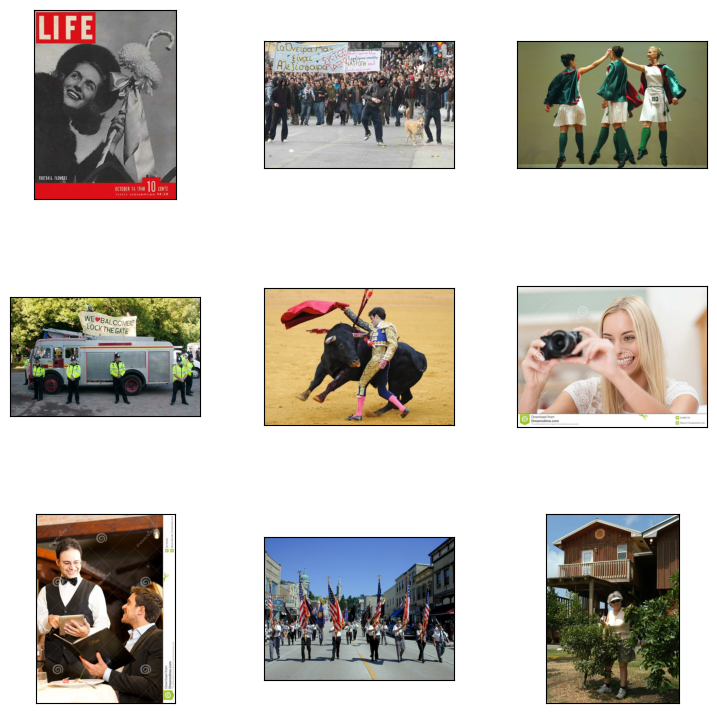

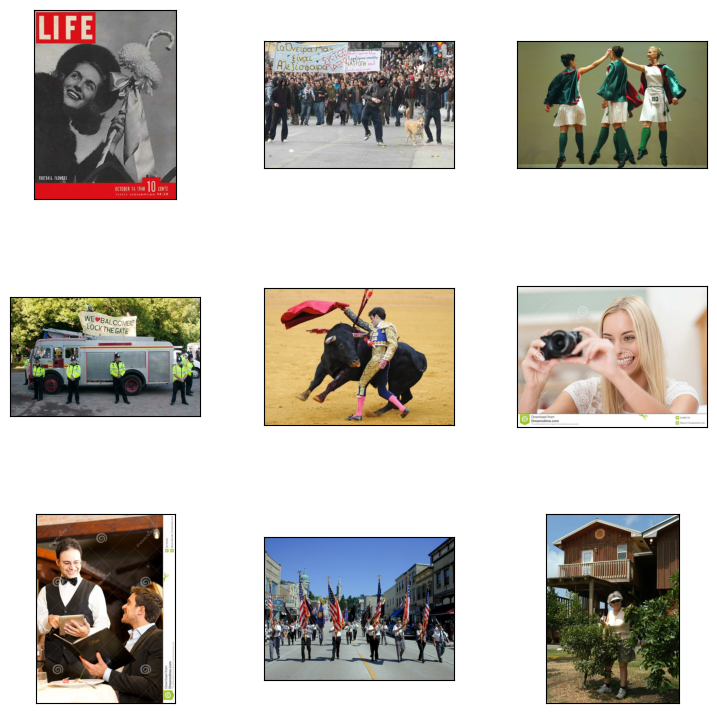

In [9]:
tfds.show_examples(ds_train, ds_info)

,faces/bbox,faces/blur,faces/expression,faces/illumination,faces/invalid,faces/occlusion,faces/pose,image,image/filename
0,,111000,FalseFalseFalseFalseFalseFalse,FalseFalseTrueFalseFalseFalse,FalseFalseFalseFalseFalseFalse,001000,TrueFalseFalseTrueFalseFalse,,54--Rescue/54_Rescue_rescuepeople_54_631.jpg
1,,010,FalseFalseFalse,FalseFalseFalse,FalseFalseFalse,000,FalseFalseFalse,,17--Ceremony/17_Ceremony_Ceremony_17_940.jpg
2,,00,FalseFalse,FalseFalse,FalseFalse,00,FalseTrue,,4--Dancing/4_Dancing_Dancing_4_138.jpg
3,,01,FalseFalse,FalseFalse,FalseFalse,00,TrueFalse,,39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_272.jpg
4,,00,FalseFalse,FalseFalse,FalseFalse,00,FalseFalse,,29--Students_Schoolkids/29_Students_Schoolkids_Students_Schoolkids_29_883.jpg
5,,0,False,False,False,1,False,,40--Gymnastics/40_Gymnastics_Gymnastics_40_625.jpg
6,,0000000...,FalseFalseFalseFalseFalseFalseFalse...,FalseFalseFalseFalseFalseFalseFalse...,FalseFalseFalseFalseFalseFalseFalse...,0000000...,FalseFalseFalseFalseFalseFalseFalse...,,12--Group/12_Group_Group_12_Group_Group_12_203.jpg
7,,00,FalseFalse,FalseFalse,FalseFalse,00,FalseFalse,,13--Interview/13_Interview_Interview_On_Location_13_642.jpg
8,,0,True,False,False,0,False,,28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_279.jpg
9,,0,False,False,False,0,False,,44--Aerobics/44_Aerobics_Aerobics_44_274.jpg

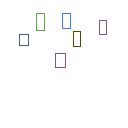
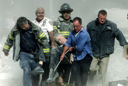
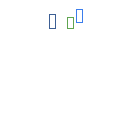
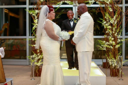
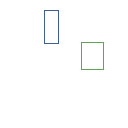
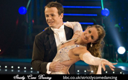
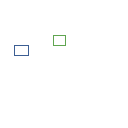
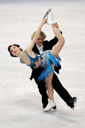
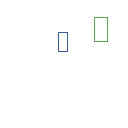
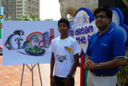
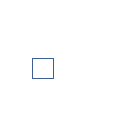
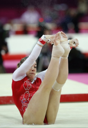
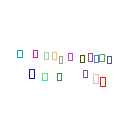
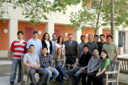
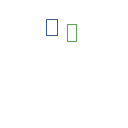
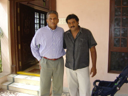
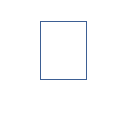
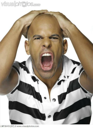
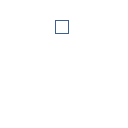
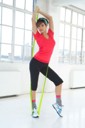

In [10]:
tfds.as_dataframe(ds_train.take(10), ds_info)